# Etape 8 : Importer les données numériques d’un tableur scientifique dans un programme python

**Notions abordées**

- Import de données numériques à partir d’un tableur

**Référence pyspc**

- [Import de données numériques](https://pyspc.readthedocs.io/fr/latest/05-bases/09-fichiers-csv.html)

**Consigne** : 

Télécharger, faire une copie du notebook « Importer les données numériques d’un tableur scientifique dans un programme python » puis répondre aux questions posées dans le notebook. Enfin effectuer la mise en situation présentée dans la dernière cellule.

-----------

Le programme présenté ci-dessous est adapté à des fichiers .csv (type tableur) obtenus lors de pointages vidéo. Il devra évidemment être adapté pour des fichiers obtenus lors d'autres expériences.

1.	Enregistrer ou exporter le fichier contenant votre tableau de données sous format .csv (ou .txt pour Avistep) dans le dossier contenant votre notebook (fichier .ipynb) ou votre programme python (fichier.py). Attention, pour l'utilisation avec l'ENT Nero version 2018, petite subtilité à la fin.

    -	Dans Regressi, enregistrer le fichier sous le format (type) OpenOffice, CSV (choisir « Vrai CSV » dans la fenêtre qui s’affiche alors).
    -	Dans Loggerpro, exporter le fichier comme CSV…
    -	Dans Aviméca, exporter les données dans Regressi puis vous reporter à la ligne ci-dessus.
    -	Dans Avistep, exporter/enregistrer le fichier sous le format .txt
    -	Dans Excel, enregistrer votre fichier sour le format CSV (séparateur:point-virgule). 
    -	Dans OpenCalc, enregistrer votre fichier sour le format CSV (texte CSV ; séparateur:point-virgule, **jeu de caractères : Unicode utf-8**)
    
    
Attention : les logiciels de pointage retournent des tableaux de colonnes avec des entêtes (une à deux lignes) qu'il faudra par la suite retranscrire sous forme de listes (une liste par colonne) sans tenir compte des entêtes.

Voici une capture d'écran du fichier parabole.csv obtenu à l'aide de Regavi/Regressi ouvert sous Excel

![Capture fichier excel](capture-excel.jpg)

Le même fichier ouvert sous Jupiter Notebook

![Capture jupyter](capture-jupyter.jpg)

2. Les cellules suivantes contiennent les lignes de code qui vous permettront d'afficher votre tableau de données sous forme de listes (une liste par colonne de votre tableau csv)

In [1]:
# Chargement de la bibliothèque csv afin de 
# pouvoir lire par la suite le fichier csv

import csv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# Ceci est une fonction (nommée charge_fichier_csv) 
# qui sera appelée si besoin est, par le programme principal 
# situé dans une autre cellule, plus loin

# Cette fonction aura pour arguments un fichier qui lui est 
# fourni par le programme principal (paramètre écrit entre 
# parenthèses et nommé ici cheminfichier), le délimiteur 
# de cellules et le nombre de lignes d'en-tête N. Il renvoie un 
# résultat au programme principal grâce à l'instruction return 
# (ici un tableau de valeurs nommé tab)

def charge_fichier_csv(cheminfichier, delimiter=";",N=0):
    with open(cheminfichier, 'r', encoding='utf-8') as f :
        rfichier = csv.reader(f, delimiter=delimiter)
        tab=[]
        index_row=0
        for row in rfichier:            
            if index_row < N:
                index_row = index_row+1
            else : 
                for i in range (len(row)): 
                    if len(tab) <= i:
                        X = []       
                        tab.append(X) 
                    try:
                        tab[i].append(float(row[i].replace(",",'.')))    
                    except ValueError:
                        print('erreur:contenu de cellule non numérique')
                        continue
            
    return tab

In [3]:
# Programme principal
# ouverture, lecture et affichage du fichier "parabole. csv" . 
# Le début du chemin n'a pas besoin d'être spécifié si le 
# fichier .csv se trouve dans le même dossier que ce fichier 
# notebook
   

table = charge_fichier_csv("parabole.csv",delimiter=";",N=2)
t=table[0]
print(t)
x=table[1]
print(x)
y=table[2]
print(y)

[0.0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28, 0.32, 0.36, 0.4, 0.44, 0.48, 0.52, 0.56, 0.6, 0.64, 0.68, 0.72]
[-0.002808944, 0.064605722, 0.140447222, 0.213479777, 0.286512333, 0.362353832, 0.435386388, 0.514036832, 0.584260443, 0.662910887, 0.738752387, 0.814593887, 0.890435386, 0.966276886, 1.039309442, 1.115150941, 1.190992441, 1.269642885, 1.339866496]
[0.0, 0.143256166, 0.266849722, 0.376398555, 0.471902665, 0.553362054, 0.617967776, 0.665719832, 0.693809276, 0.713471887, 0.713471887, 0.69661822, 0.660101943, 0.617967776, 0.553362054, 0.469093721, 0.37358961, 0.261231833, 0.134829333]


Répondre aux questions suivantes :

   - Quelle ligne de code dans le programme principal permet d'appeler la fonction ?

- Comment s'appelle le fichier envoyé à la fonction par le programme principal ?

- Que doit-on écrire entre parenthèses lors de l'appel de la fonction pour pouvoir accéder au fichier?

- Comment s'appelle les paramètres correspondant dans la fonction ?

- Comment s'appelle la variable contenant le tableau renvoyé par la fonction dans le programme principal ?

La suite du notebook vous donne un aperçu de ce qu'il est possible de faire avec les données importées.

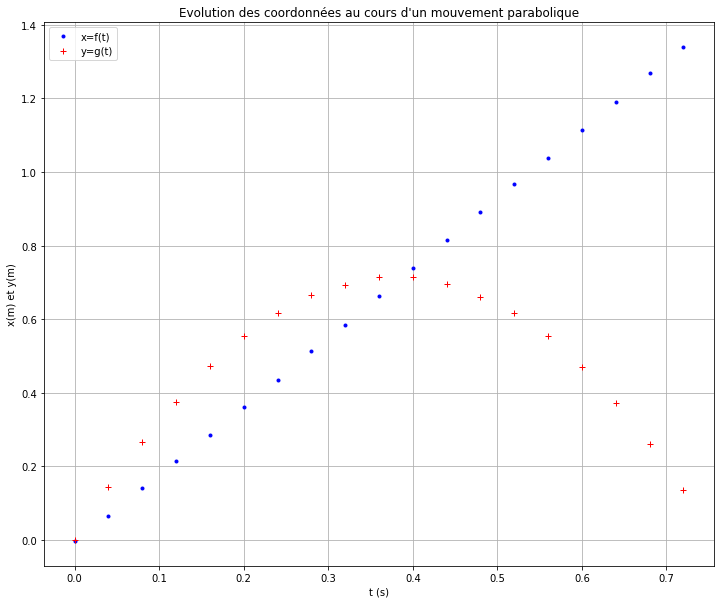

In [4]:
# Affichage des courbes x=f(t) et y=g(t)
fig = plt.figure(figsize=(12,10))
plt.plot(t,x,'.b',label='x=f(t)')
plt.plot(t,y,'r+',label='y=g(t)')
plt.legend()
plt.xlabel("t (s)")
plt.ylabel("x(m) et y(m)")
plt.grid()
plt.title("Evolution des coordonnées au cours d'un mouvement parabolique")
plt.show()

In [5]:
# Modélisation de la courbe x=f(t)

t=np.array(t)

coeffx=np.polyfit(t, x,1)

# Affichage du tableau coeffx
print('coefficients de Xmodel:', coeffx)

# Affichage des valeurs contenues dans la liste avec une décimale
print ('coeffx[0]=','{0:.1f}'.format(coeffx[0]),'\n', 
       'coeffx[1]=','{0:.1f}'.format(coeffx[1])) 

# Création puis affichage d'un tableau Xmodel regroupant les valeurs 
# de la coordonnée x modélisée par une fonction affine.  

Xmodel = coeffx[0]*t+coeffx[1]
print('Le tableau contenant les valeurs de Xmodel est:\n',Xmodel)

# Modélisation de la courbe y=g(t)

coeffy=np.polyfit(t, y,2)

# Affichage de la liste coeff
print('coefficients de Ymodel:', coeffy)

# Affichage des valeurs contenues dans la liste avec une décimale
print ('coeffy[0]=','{0:.1f}'.format(coeffy[0]),'\n', 
       'coeffy[1]=','{0:.1f}'.format(coeffy[1]),'\n', 
       'coeffy[2]=','{0:.1f}'.format(coeffy[2]))

# Création puis affichage d'un tableau Ymodel regroupant les valeurs 
# de la coordonnée y modélisée par une fonction polynome du second degré.  

Ymodel = coeffy[0]*t**2+coeffy[1]*t+coeffy[2]
print('Le tableau contenant les valeurs de Ymodel est:\n',Ymodel)

coefficients de Xmodel: [ 1.8766952  -0.01107315]
coeffx[0]= 1.9 
 coeffx[1]= -0.0
Le tableau contenant les valeurs de Xmodel est:
 [-0.01107315  0.06399465  0.13906246  0.21413027  0.28919808  0.36426589
  0.43933369  0.5144015   0.58946931  0.66453712  0.73960493  0.81467273
  0.88974054  0.96480835  1.03987616  1.11494397  1.19001177  1.26507958
  1.34014739]
coefficients de Ymodel: [-4.98167828e+00  3.77690491e+00 -2.15000401e-03]
coeffy[0]= -5.0 
 coeffy[1]= 3.8 
 coeffy[2]= -0.0
Le tableau contenant les valeurs de Ymodel est:
 [-0.00215     0.14095551  0.26811965  0.37934242  0.47462382  0.55396385
  0.61736251  0.66481979  0.69633571  0.71191026  0.71154343  0.69523524
  0.66298568  0.61479474  0.55066244  0.47058876  0.37457371  0.2626173
  0.13471951]


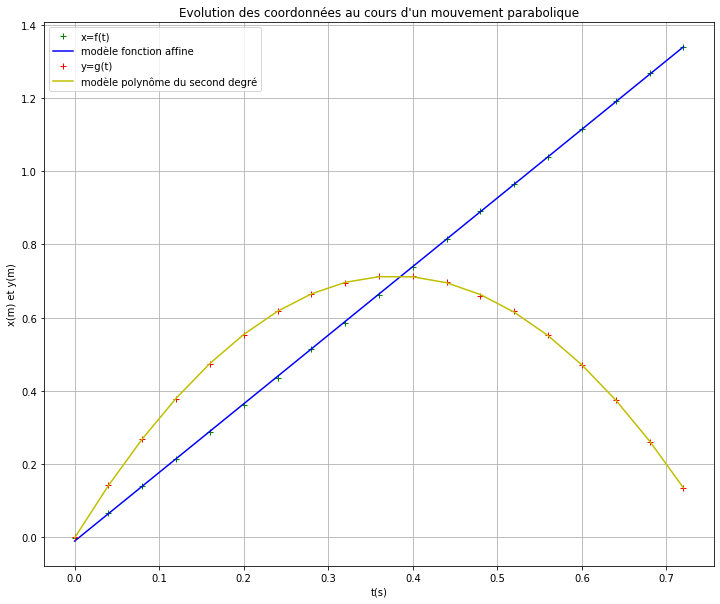

In [6]:
# Affichage des courbes modélisées

fig = plt.figure(figsize=(12,10))
plt.plot(t,x,'g+',label='x=f(t)')
plt.plot(t,Xmodel,'b-',label='modèle fonction affine')
plt.plot(t,y,'r+',label='y=g(t)')
plt.plot(t,Ymodel,'y-',label='modèle polynôme du second degré')
plt.legend()
plt.xlabel("t(s)")
plt.ylabel("x(m) et y(m)")
plt.grid()
plt.title("Evolution des coordonnées au cours d'un mouvement parabolique")
plt.show()

**Mise en situation**

- Télécharger le programme complet niveau seconde : étude de la chute d'une balle lachée par un cycliste en mouvement.
- Télécharger le fichier "chute_balle.csv" dans le même dossier.
- Puis étudier ce programme. 

-----------------